In [51]:
import pandas as pd
import os
import matplotlib
import seaborn as sns

In [2]:
os.listdir("../data/raw/ecommerce-dataset/")

['category_tree.csv',
 'events.csv',
 'item_properties_part1.csv',
 'item_properties_part2.csv']

In [3]:
events = pd.read_csv("../data/raw/ecommerce-dataset/events.csv")

In [4]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [5]:
events.shape

(2756101, 5)

In data we have 1,4 milion unique users. Only 11,7 thousand users purchased something. 1,1 milion users have interaction only with one item. 
We have 235 thousand items. Only 12 thousand items was purchased. 

In [61]:
events.itemid.value_counts().describe()

count    235061.000000
mean         11.725046
std          37.032101
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        3412.000000
Name: itemid, dtype: float64

In [64]:
events.itemid[events['event'] == 'transaction' ].nunique()

12025

In [62]:
events.visitorid.value_counts().describe()

count    1.407580e+06
mean     1.958042e+00
std      1.258049e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.757000e+03
Name: visitorid, dtype: float64

In [24]:
events.visitorid[events['event'] == 'transaction' ].nunique()

11719

In [37]:
events.groupby(["visitorid"]).itemid.nunique().value_counts()[:10]

1     1119500
2      170551
3       54235
4       23659
5       12650
6        7400
7        4655
8        3198
9        2286
10       1660
Name: itemid, dtype: int64

In [39]:
events.groupby(["visitorid"]).itemid.nunique().value_counts().median()

1.0

In [54]:
max(events.groupby(["visitorid"]).itemid.nunique())

3814

In [ ]:
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() > 500]

In [60]:
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() > 500].index

Int64Index([  38015,   53842,   76757,   77390,   79627,   85734,  138131,
             152963,  163561,  165052,  173863,  198270,  229157,  247235,
             286616,  310759,  316850,  350566,  371606,  389532,  518659,
             527307,  530559,  548772,  638482,  645525,  684514,  705542,
             737053,  757355,  765630,  825321,  836635,  861299,  892013,
             895999,  994820, 1126569, 1150086, 1161163, 1165148, 1297062,
            1327144],
           dtype='int64', name='visitorid')

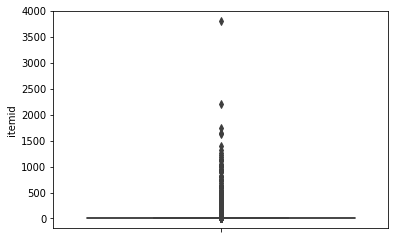

In [55]:
sns.boxplot( y=events.groupby(["visitorid"]).itemid.nunique() )

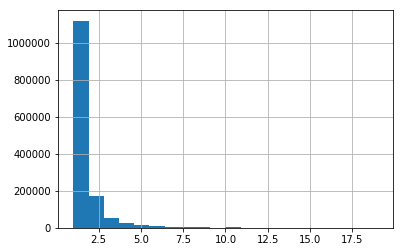

In [56]:
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() <20].hist(bins=20)

In [7]:
events.event.value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

In [8]:
events.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [9]:
events['datetime'] = pd.to_datetime(events['timestamp'],unit='ms')

Data are from range between 2015-05-03 and 2015-09-18

In [10]:
min(events['datetime'])

Timestamp('2015-05-03 03:00:04.384000')

In [11]:
max(events['datetime'])

Timestamp('2015-09-18 02:59:47.788000')

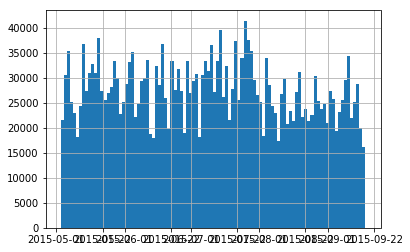

In [16]:
events['datetime'].hist(bins=100)

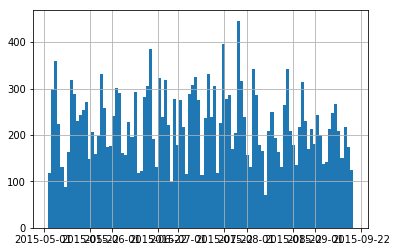

In [13]:
events['datetime'][events['event'] == 'transaction' ].hist(bins=100)

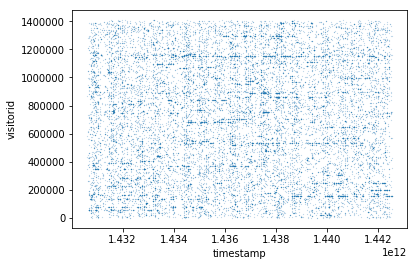

In [14]:
events[events['event'] == 'transaction'].plot.scatter('timestamp','visitorid',s=0.01)

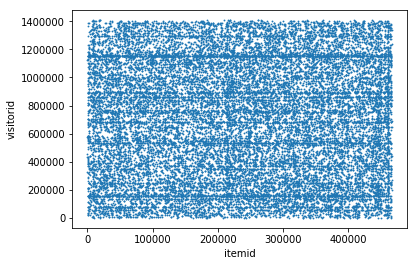

In [15]:
events[events['event'] == 'transaction'].plot.scatter('itemid','visitorid',s=0.7)